In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75) # here we are changing values less than 0.75 to 0 and above 0.75 to 1
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [6]:
x = df.drop('Chance of Admit ',axis=1) # dropping the admitted column
y = df['Chance of Admit ']

In [7]:
y=y.astype('int')

In [8]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [14]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
classifier = DecisionTreeClassifier(random_state=0)

In [16]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
result = pd.DataFrame(
{
    'actual':y_test,
    'predicted':y_pred
})

In [20]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [25]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
dip.plot()

NameError: name 'ConfusionMatrixDisplay' is not defined

In [26]:
accuracy_score(y_test,y_pred)

0.9

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [28]:
from sklearn.tree import plot_tree

In [29]:
import matplotlib.pyplot as plt

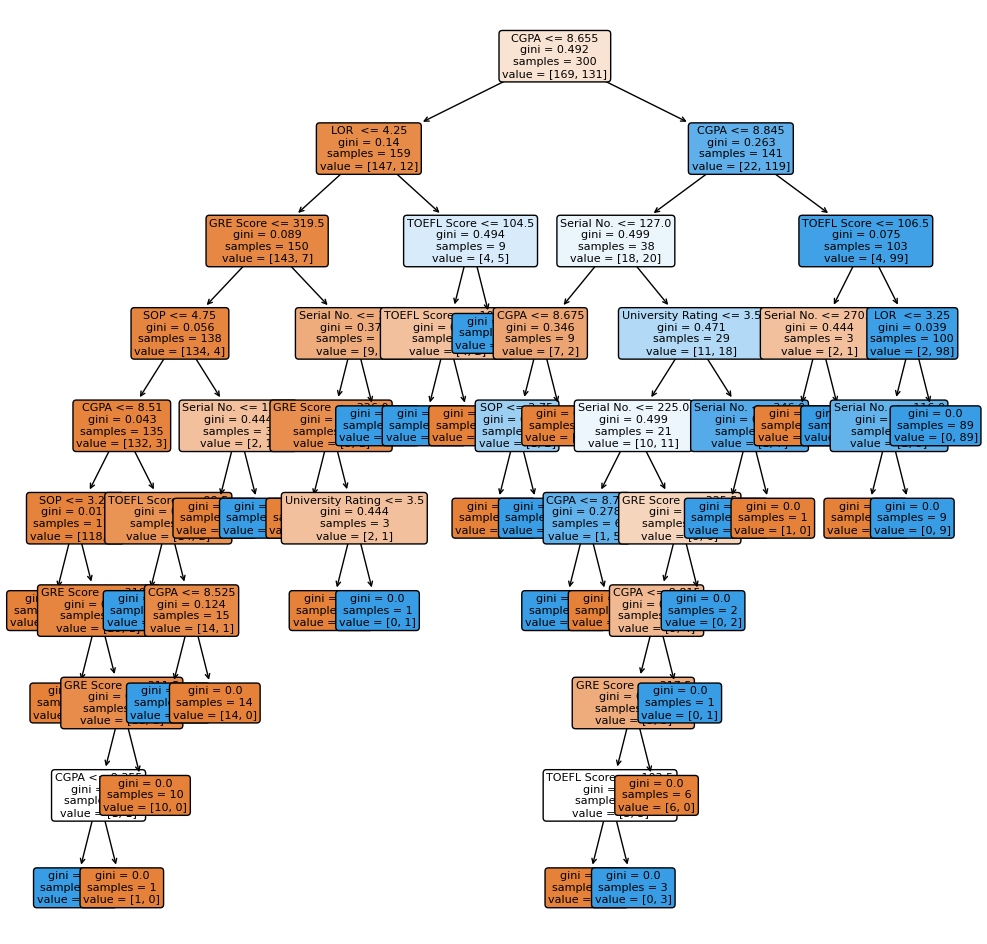

In [32]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns);